<a href="https://colab.research.google.com/github/rgrion/mslsistemasadaptativos/blob/main/sistemas_adaptativos_ia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel("estudos_adaptativos.xlsx")

df

,Unnamed: 0,tec_fuzzy,tec_bayesiana,tec_ml_pred_class,tec_ml_interpretavel,tec_subskills,tec_ecd,tec_LPA,tec_sensores_ubiquos,tec_llm,...,ben_personalizacao,ben_red_lacunas,ben_eficiencia,ben_apoio_docente,ben_inclusao,des_qualidade_dados,des_custo_comp,des_ali_pedagogico,des_privacidade,des_infra_organizacao
0,[AL-Chalabi et al. 2021],1,1,0,0,0,0,0,0,0,...,1,1,0,0,1,1,0,0,0,1
1,[Calo and MacLellan 2024],0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,[Chen et al. 2024],0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,1,0
3,[Chergui et al. 2021],0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4,[Chergui et al. 2024],0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,[Eryilmaz and Adabashi 2020],1,1,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,1,0,0
6,[Ezzaim et al. 2024],0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,[Ghergulescu et al. 2021],0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
8,[Kubsch et al. 2022],0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,[Lechuga and Doroudi 2023],0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
cols_tec = [c for c in df.columns if c.startswith("tec_")]
cols_ben = [c for c in df.columns if c.startswith("ben_")]
cols_des = [c for c in df.columns if c.startswith("des_")]

freq_tec = df[cols_tec].sum().sort_values(ascending=False)
freq_ben = df[cols_ben].sum().sort_values(ascending=False)
freq_des = df[cols_des].sum().sort_values(ascending=False)

print("Frequência de técnicas (número de estudos):")
print(freq_tec)

print("\nFrequência de benefícios:")
print(freq_ben)

print("\nFrequência de desafios:")
print(freq_des)

Frequência de técnicas (número de estudos):
tec_ml_pred_class       7
tec_fuzzy               4
tec_llm                 3
tec_subskills           3
tec_bayesiana           2
tec_ml_interpretavel    1
tec_ecd                 1
tec_LPA                 1
tec_sensores_ubiquos    1
tec_eye-tracking        1
dtype: int64

Frequência de benefícios:
ben_desempenho        6
ben_personalizacao    6
ben_engajamento       4
ben_red_lacunas       4
ben_eficiencia        3
ben_apoio_docente     3
ben_inclusao          2
dtype: int64

Frequência de desafios:
des_qualidade_dados      7
des_custo_comp           7
des_ali_pedagogico       6
des_infra_organizacao    6
des_privacidade          4
dtype: int64


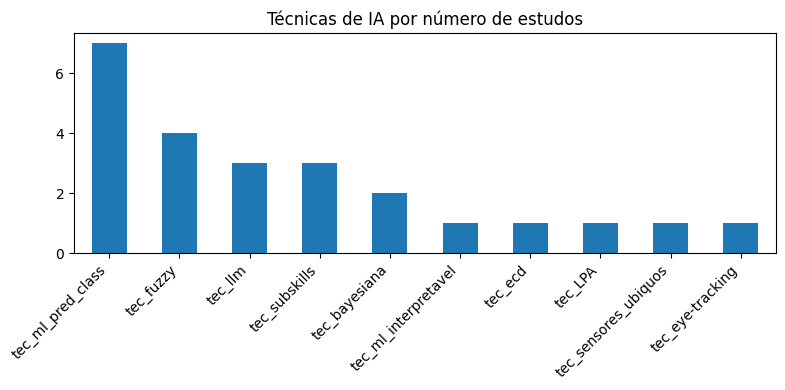

In [ ]:
plt.figure(figsize=(8,4))
freq_tec.plot(kind="bar")
plt.title("Técnicas de IA por número de estudos")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Combina benefícios e desafios em um único eixo
cols_ben_des = cols_ben + cols_des

# Matriz de coocorrência unificada
cooc_full = df[cols_tec].T.dot(df[cols_ben_des])

cooc_full

,ben_desempenho,ben_engajamento,ben_personalizacao,ben_red_lacunas,ben_eficiencia,ben_apoio_docente,ben_inclusao,des_qualidade_dados,des_custo_comp,des_ali_pedagogico,des_privacidade,des_infra_organizacao
tec_fuzzy,2,2,3,2,0,0,1,2,1,2,0,2
tec_bayesiana,2,0,2,2,0,0,1,2,0,1,0,1
tec_ml_pred_class,4,0,1,0,3,1,0,4,3,1,0,3
tec_ml_interpretavel,1,0,0,0,1,0,0,1,0,1,0,0
tec_subskills,0,1,1,2,0,1,0,1,0,2,0,1
tec_ecd,0,0,0,0,0,0,0,0,0,0,0,0
tec_LPA,0,0,0,0,0,0,0,0,0,0,0,0
tec_sensores_ubiquos,0,0,0,0,0,0,0,0,1,0,1,0
tec_llm,0,1,1,0,0,1,0,0,2,1,2,0
tec_eye-tracking,0,1,1,0,0,0,0,0,1,0,1,0


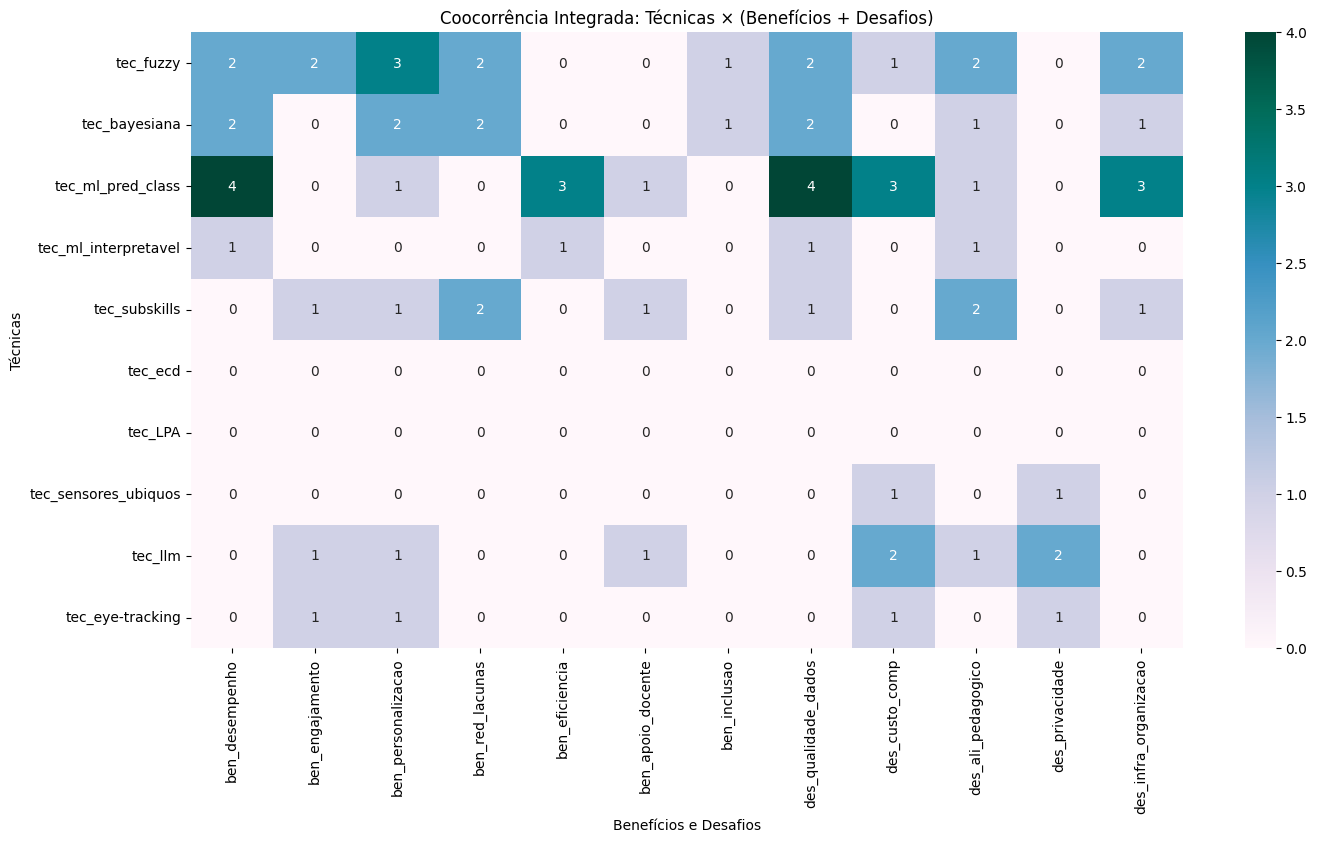

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(cooc_full, annot=True, cmap="PuBuGn")
plt.title("Coocorrência Integrada: Técnicas × (Benefícios + Desafios)")
plt.xlabel("Benefícios e Desafios")
plt.ylabel("Técnicas")
plt.show()
